In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier

In [2]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']


train = pd.read_csv('C:\\Users\\melchiz shroff\\Downloads\\adult.csv',header=None)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train.columns= col_labels

In [5]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train1= train.copy()

In [7]:
test= pd.read_csv("C:\\Users\\melchiz shroff\\Downloads\\adult_test.csv",header=None)

In [8]:
test.columns= col_labels

In [9]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


EDA

In [10]:
#Checking for missing values in train data

train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
train['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [13]:
train['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
#We are seeing special characters like question marks in row data which needs to analyzed

for variable in col_labels:
    if train[variable].dtype=='object':
        print(variable, end=" ",)
        print("   ")
        print(train[variable].value_counts())

workclass    
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
education    
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
marital_status    
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
occupation    
 Prof-sp

Workclass, occupation and native_country have question marks in their row data

In [15]:
work= pd.DataFrame(train['workclass'].value_counts())

In [16]:
work.columns=['Count']

In [17]:
work['Percent']= work['Count']/train.shape[0]*100

In [18]:
work

,Count,Percent
Private,22696,69.703019
Self-emp-not-inc,2541,7.803814
Local-gov,2093,6.427935
?,1836,5.638647
State-gov,1298,3.986364
Self-emp-inc,1116,3.427413
Federal-gov,960,2.948312
Without-pay,14,0.042996
Never-worked,7,0.021498


In [19]:
occupation = pd.DataFrame(train['occupation'].value_counts())
occupation.columns= ['Count']

In [20]:
occupation['Percent']= occupation['Count']/train.shape[0]*100

In [21]:
nativity= pd.DataFrame(train['native_country'].value_counts())
nativity.columns= ['Count']
nativity['Percent']= nativity['Count']/train.shape[0]*100

In [22]:
occupation

,Count,Percent
Prof-specialty,4140,12.714597
Craft-repair,4099,12.588680
Exec-managerial,4066,12.487331
Adm-clerical,3770,11.578268
Sales,3650,11.209729
Other-service,3295,10.119468
Machine-op-inspct,2002,6.148460
?,1843,5.660146
Transport-moving,1597,4.904641
Handlers-cleaners,1370,4.207487


In [23]:
nativity

,Count,Percent
United-States,29170,89.585701
Mexico,643,1.974755
?,583,1.790486
Philippines,198,0.608089
Germany,137,0.420749
Canada,121,0.371610
Puerto-Rico,114,0.350112
El-Salvador,106,0.325543
India,100,0.307116
Cuba,95,0.291760


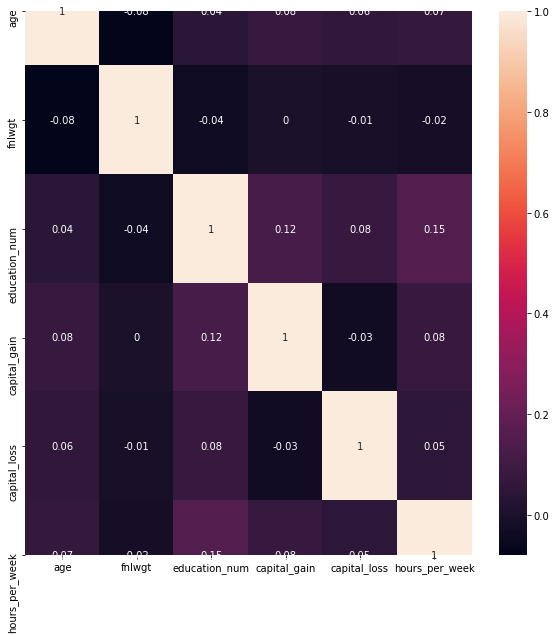

In [24]:
#Let us observe the correlation between variables
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(train.corr().round(2),annot=True)

In [25]:
work_special= work.iloc[3:4,1:2].values
occupation_special= occupation.iloc[7:8,1:2].values
nativity_special = nativity.iloc[2:3, 1:2].values

In [26]:
print("The percent of ? is above mentioned features are as follows \nThe workclass has {}% of ? \nThe occupation has {}% of ? \nThe nativity has {}% of ?".format(work_special[0][0], occupation_special[0][0], nativity_special[0][0]))

The percent of ? is above mentioned features are as follows 
The workclass has 5.638647461687294% of ? 
The occupation has 5.660145572924664% of ? 
The nativity has 1.7904855501980899% of ?


In [29]:
train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [30]:
train.to_csv("C:\\Users\\melchiz shroff\\Desktop\\X_data.csv")

In [42]:
data= pd.read_csv("C:\\Users\\melchiz shroff\\Desktop\\X_data.csv")

In [43]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


education and education_num both tell the same data. One is a label and the other indicates a numerical value. As always 
numerical value is preferable when compared to a label, so we will drop education. The same goes to marital_status and relationship for telling the same data about the candidate. We can remove one of them.

In [44]:
data['marital_status'].value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital_status, dtype: int64

In [45]:
data['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: relationship, dtype: int64

In [49]:
#Mapping the target variable
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

data['wage_class']= le.fit_transform(data[['wage_class']]).ravel()

In [51]:
data.drop(['income'],axis=1,inplace=True)

In [52]:
data['wage_class'].value_counts()

0    22654
1     7508
Name: wage_class, dtype: int64

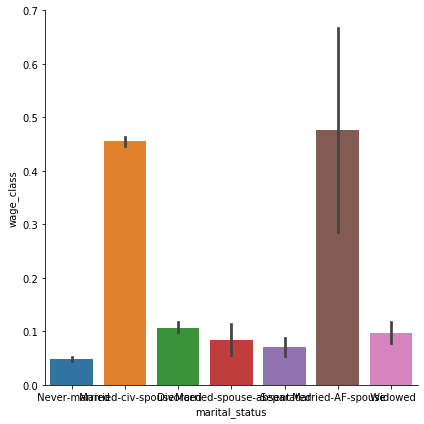

In [55]:
#marital_status vs wage class
sns.factorplot(x='marital_status',y='wage_class',data=data,kind='bar',height=6)
plt.show()

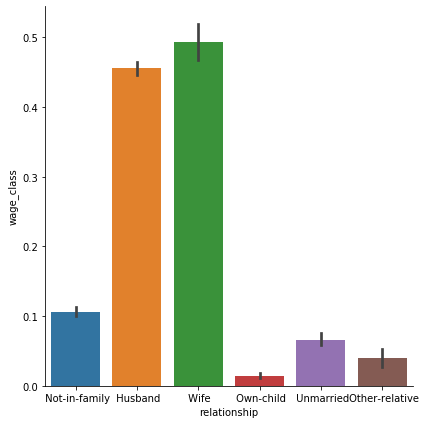

In [56]:
#relationship vs wage class
sns.factorplot(x='relationship',y='wage_class',data=data,kind='bar',height=6)
plt.show()

Relationship and marital status convey the same data and also seem to have similar distribution.

We will drop both education in labels and relationship

In [60]:
data.drop(['education','relationship'],axis=1,inplace=True)

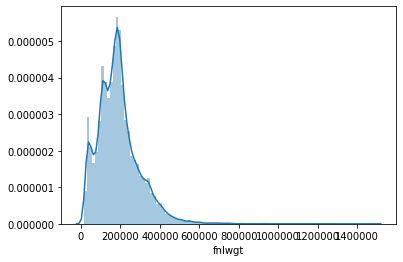

In [57]:
sns.distplot(data['fnlwgt'], bins=100)

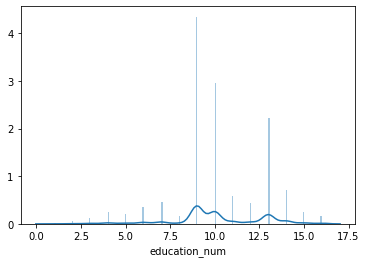

In [58]:
sns.distplot(data['education_num'], bins=200)

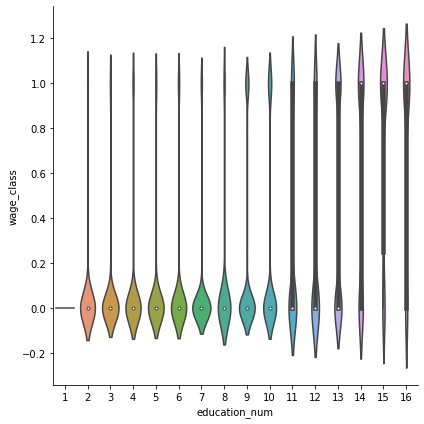

In [61]:
sns.catplot(x='education_num',y='wage_class',data=data,kind='violin',height=6)
plt.show()

The density was higher for revenue greater than 50k as education level increased along x-axis. Denoting higher pay probability with higher the education

<Figure size 144x144 with 0 Axes>

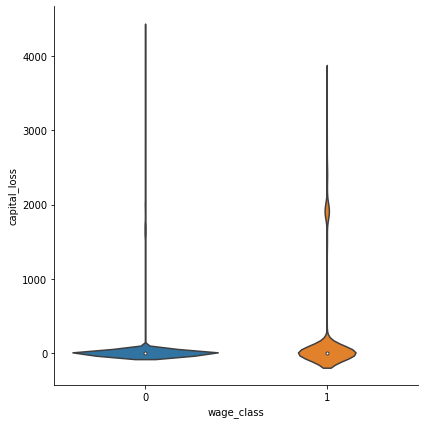

In [62]:
plt.figure(figsize=(2,2))
sns.catplot(x='wage_class',y='capital_loss',data=data,kind='violin',height=6)
plt.show()

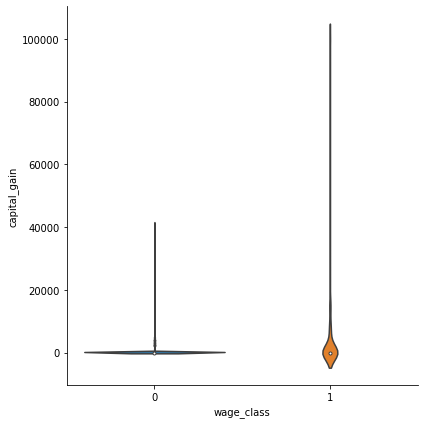

In [63]:
sns.catplot(x='wage_class',y='capital_gain',data=data,kind='violin',height=6)
plt.show()

Nearly 91.6% of capital gain and capital loss are at zero and only 8.4% have recorded data of some value as evident from
the plots above

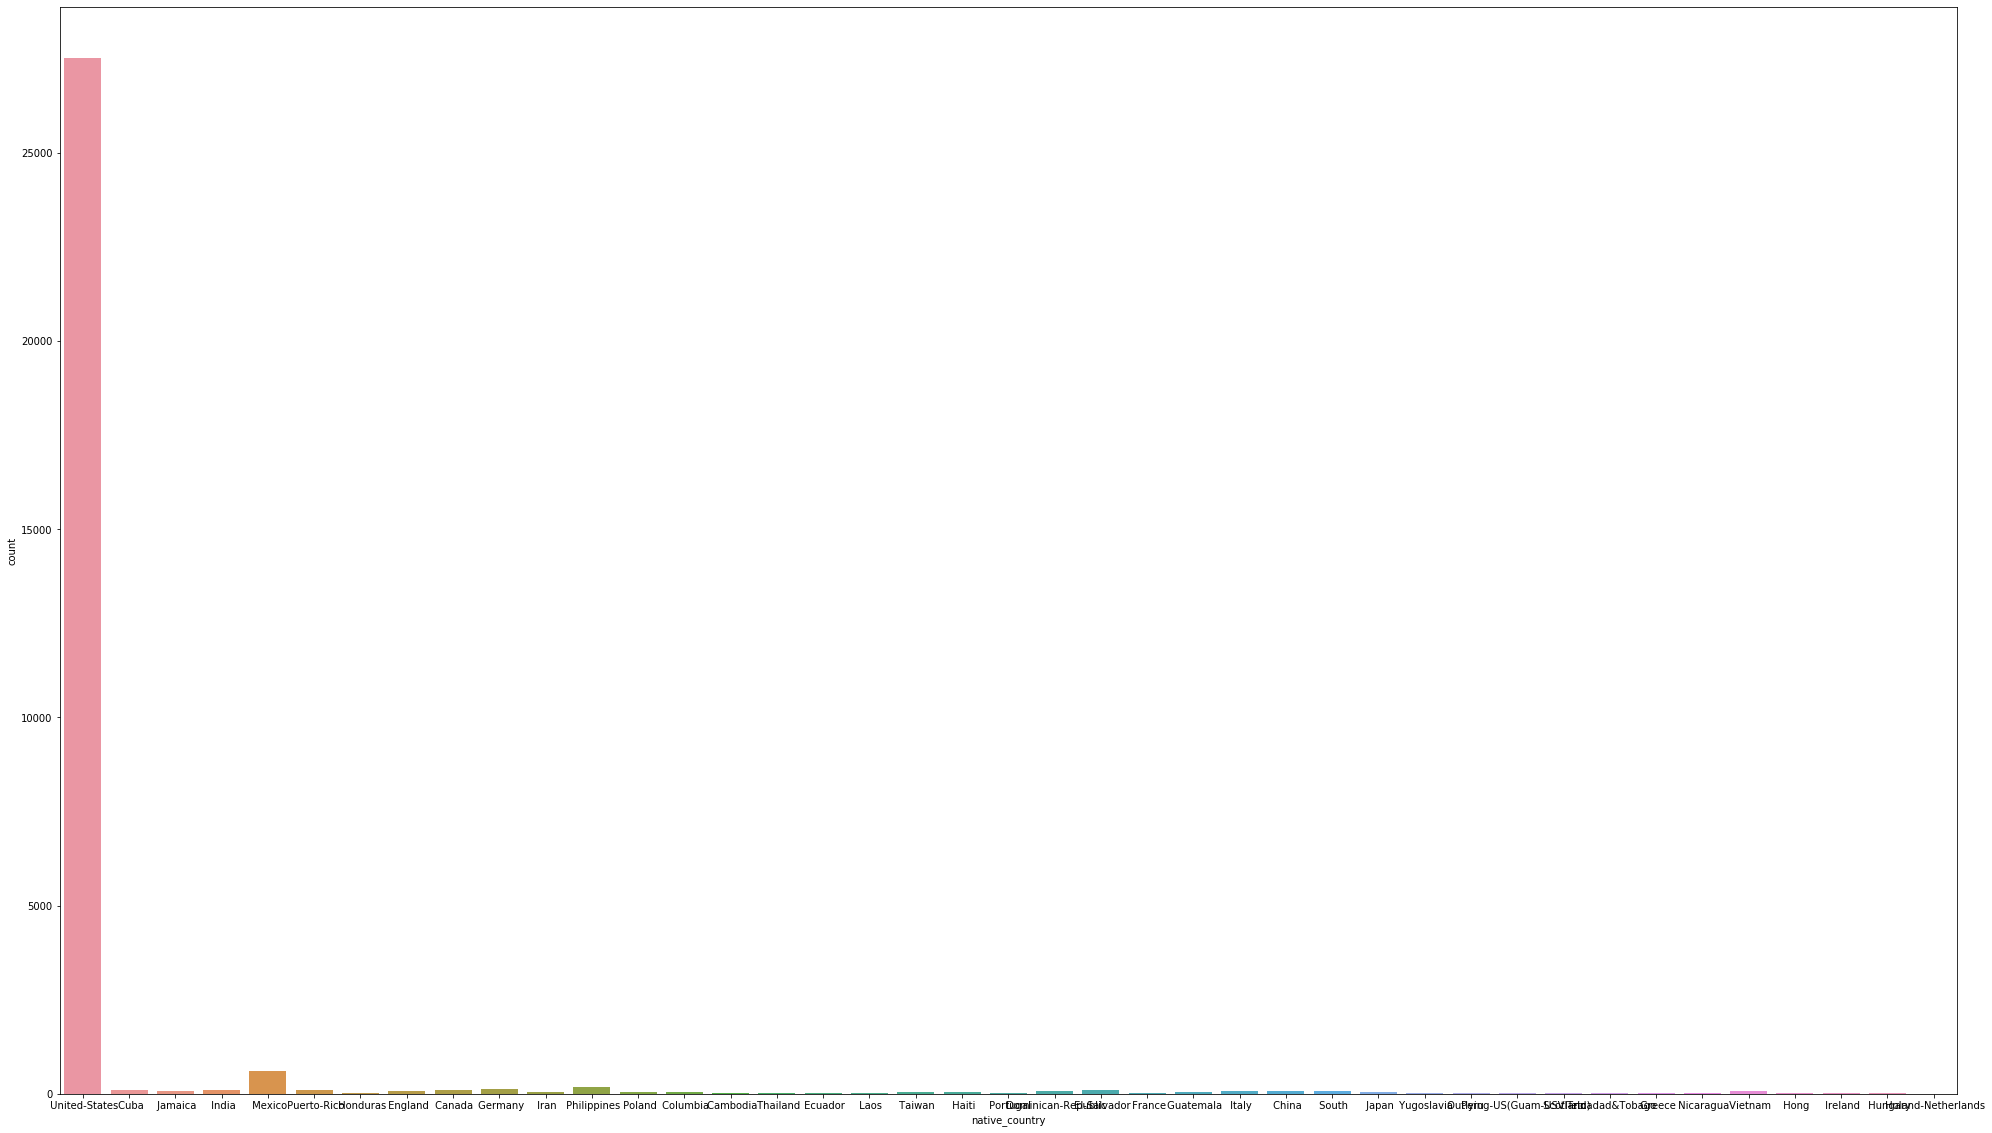

In [64]:
#explore which country do most people belong
plt.figure(figsize=(34, 20))
sns.countplot(x='native_country',data=data)
plt.show()

Nearly 27000 or more belong to United States and a scatter across other countries. We can drop this column due to 
high bias.

In [65]:
#Dropping native_country due to bias in distribution

data.drop(['native_country'],axis=1,inplace=True)

In [66]:
data.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,State-gov,77516,13,Never-married,Adm-clerical,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,White,Male,0,0,40,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,0


WORKCLASS VS OCCUPATION

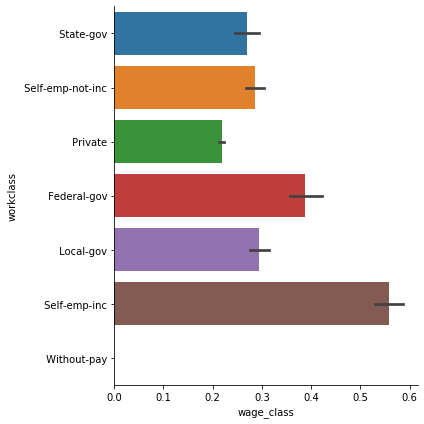

In [75]:
#workclass vs wage class
sns.catplot(x='wage_class',y='workclass',data=data,kind='bar',height=6)
plt.show()

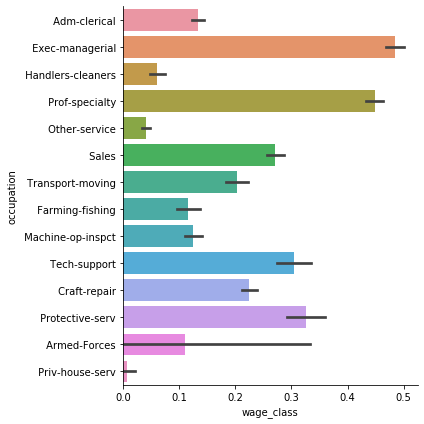

In [74]:
#workclass vs wage class
sns.catplot(x='wage_class',y='occupation',data=data,kind='bar',height=6)
plt.show()

In [73]:
data['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

workclass and occupation are same. Workclass is broadly categorized and better summarizes data

In [76]:
data.drop(['occupation'],axis=1,inplace=True)

In [77]:
data.head()

,age,workclass,fnlwgt,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,State-gov,77516,13,Never-married,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,White,Male,0,0,13,0
2,38,Private,215646,9,Divorced,White,Male,0,0,40,0
3,53,Private,234721,7,Married-civ-spouse,Black,Male,0,0,40,0
4,28,Private,338409,13,Married-civ-spouse,Black,Female,0,0,40,0


from the displot done previously on fnlwgt shows data to be skewed and plus it it the final weight and doesn't really explain the data and can be dropped

In [78]:
data.drop(['fnlwgt'],axis=1,inplace=True)

In [79]:
data.head()

,age,workclass,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,State-gov,13,Never-married,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,White,Male,0,0,13,0
2,38,Private,9,Divorced,White,Male,0,0,40,0
3,53,Private,7,Married-civ-spouse,Black,Male,0,0,40,0
4,28,Private,13,Married-civ-spouse,Black,Female,0,0,40,0


In [91]:
data1= data.copy()

In [97]:
#Encoding categorical variables

"""We could use target encoding for marital status. However due to imbalance in target it could lead to bias.
As we can see there are several levels to marital_status which can be summarized into married and not_married"""
level= data1['marital_status'].unique()

In [98]:
level

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [99]:
map1= {' Never-married':'Not_married', ' Married-civ-spouse':'Married', ' Divorced':'Married',
       ' Married-spouse-absent':'Married', ' Separated':'Not_married', ' Married-AF-spouse':'Married',
       ' Widowed':'Not_married'}

data1['Marriage']= data1['marital_status'].replace(map1)

In [100]:
data1['Marriage'].value_counts()

Married        18670
Not_married    11492
Name: Marriage, dtype: int64

In [102]:
data1.drop(['marital_status'],axis=1,inplace=True)

In [103]:
data1.head()

,age,workclass,education_num,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,Marriage
0,39,State-gov,13,White,Male,2174,0,40,0,Not_married
1,50,Self-emp-not-inc,13,White,Male,0,0,13,0,Married
2,38,Private,9,White,Male,0,0,40,0,Married
3,53,Private,7,Black,Male,0,0,40,0,Married
4,28,Private,13,Black,Female,0,0,40,0,Married


In [104]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 10 columns):
age               30162 non-null int64
workclass         30162 non-null object
education_num     30162 non-null int64
race              30162 non-null object
sex               30162 non-null object
capital_gain      30162 non-null int64
capital_loss      30162 non-null int64
hours_per_week    30162 non-null int64
wage_class        30162 non-null int64
Marriage          30162 non-null object
dtypes: int64(6), object(4)
memory usage: 2.3+ MB


In [105]:
from sklearn.preprocessing import LabelEncoder

for column in data1:
    enc=LabelEncoder()
    if data1.dtypes[column]==np.object:
         data1[column]=enc.fit_transform(data1[column])

In [106]:
data1.head()

,age,workclass,education_num,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,Marriage
0,39,5,13,4,1,2174,0,40,0,1
1,50,4,13,4,1,0,0,13,0,0
2,38,2,9,4,1,0,0,40,0,0
3,53,2,7,2,1,0,0,40,0,0
4,28,2,13,2,0,0,0,40,0,0


In [108]:
data1.shape

(30162, 10)

In [109]:
x= data1.drop(['wage_class'],axis=1)
y= data1['wage_class']

In [110]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [111]:
print("xtrain shape is", xtrain.shape)
print("xtest shape is", xtest.shape)
print("ytrain shape is", ytrain.shape)
print("ytest shape is", ytest.shape)

xtrain shape is (21113, 9)
xtest shape is (9049, 9)
ytrain shape is (21113,)
ytest shape is (9049,)


In [112]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'n_estimators': 100
}

from xgboost.sklearn import XGBClassifier

In [113]:
xgb = XGBClassifier(**params).fit(xtrain,ytrain)

In [114]:
ypred= xgb.predict(xtest)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.852469886175268

In [120]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [121]:
clf=RandomForestClassifier()
kf=StratifiedKFold(n_splits=5)
max_features=np.array([1,2,3,4,5])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)

In [122]:
tuned_mod= grid.fit(xtrain,ytrain)

In [123]:
tuned_mod.best_params_

{'max_features': 4, 'min_samples_leaf': 25, 'n_estimators': 200}

In [124]:
param1= {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'max_features': 4,
    'min_samples_leaf':25,
    'learning_rate': .5,
    'n_estimators': 200
}

In [125]:
xgb1= XGBClassifier(**param1).fit(xtrain,ytrain)

In [126]:
ypred1= xgb1.predict(xtest)

In [127]:
accuracy_score(ytest,ypred1)

0.853243452315173